In [1]:
!wget https://aseblr-my.sharepoint.com/:x:/g/personal/bl_en_u4cse22138_bl_students_amrita_edu/EbF5jg4mQIRCpMVoZwqyUdkB-dfAn6ei5u6QvgKGxEhsvw?download=1
!mv EbF5jg4mQIRCpMVoZwqyUdkB-dfAn6ei5u6QvgKGxEhsvw?download=1 dataset.csv

--2024-08-15 17:56:39--  https://aseblr-my.sharepoint.com/:x:/g/personal/bl_en_u4cse22138_bl_students_amrita_edu/EbF5jg4mQIRCpMVoZwqyUdkB-dfAn6ei5u6QvgKGxEhsvw?download=1
Resolving aseblr-my.sharepoint.com (aseblr-my.sharepoint.com)... 13.107.136.10, 13.107.138.10, 2620:1ec:8f8::10, ...
Connecting to aseblr-my.sharepoint.com (aseblr-my.sharepoint.com)|13.107.136.10|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/bl_en_u4cse22138_bl_students_amrita_edu/Documents/Semester%205/Machine%20Learning/Project/Dataset/dataset_new.csv?ga=1 [following]
--2024-08-15 17:56:40--  https://aseblr-my.sharepoint.com/personal/bl_en_u4cse22138_bl_students_amrita_edu/Documents/Semester%205/Machine%20Learning/Project/Dataset/dataset_new.csv?ga=1
Reusing existing connection to aseblr-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 193716380 (185M) [application/octet-stream]
Saving to: ‘EbF5jg4mQIRCpMVoZwqyUdkB-dfAn6ei5u6QvgKGxEhsvw?downloa

In [2]:
import pandas as pd

df = pd.read_csv("./dataset.csv", nrows=10000)
df.rename(columns={
    "text": "text",
    "label": "is_AI"
}, inplace=True)

display(df)

,text,is_AI
0,The Face on Mars is nothing but a natural occu...,0
1,Students have a higher chance of catching a vi...,0
2,Driverless cars have good and bad things that ...,0
3,Some people might think that traveling in a gr...,1
4,How many of us students want to be forced to d...,0
...,...,...
9995,Venus is an extremely inhabitable environment ...,0
9996,First impressions are a crucial aspect of huma...,1
9997,"A few months ago, I had a simple, yet an impac...",0
9998,"""Try to work harder in life, that will help yo...",0


In [31]:
# Q1
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

vectorizer = TfidfVectorizer(max_features=100, stop_words="english")

features = vectorizer.fit_transform(df["text"]).toarray()

feat_df = pd.DataFrame(features)
display(feat_df)

ai_feat = feat_df[df["is_AI"] == 1]
human_feat = feat_df[df["is_AI"] == 0]

ai_mean = ai_feat.mean(axis=0)
human_mean = human_feat.mean(axis=0)

print("AI text feature mean:", ai_mean.to_numpy())
print()
print("Human text feature mean:", human_mean.to_numpy())
print()

ai_std = np.std(ai_feat, axis=0)
human_std = np.std(human_feat, axis=0)

print(f"AI text feature spread (S.D):", ai_std.to_numpy())
print()
print(f"Human text feature spread (S.D):", human_std.to_numpy())
print()

interclass_dist = np.linalg.norm(ai_mean - human_mean)
print(f"Distance between mean vectors between AI text and Human text feature vectors: {interclass_dist}")

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.077574,0.000000,0.000000,...,0.000000,0.089072,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,0.033843,0.000000,0.000000,0.000000,0.000000,0.033319,0.0,0.037848,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.031571,0.111871,0.061638,0.000000
2,0.042552,0.000000,0.000000,0.000000,0.000000,0.041893,0.0,0.000000,0.000000,0.250074,...,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.039695,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.324658,0.287605,0.000000,0.000000
4,0.043018,0.589163,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.040130,0.035550,0.039174,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.051405,0.000000,0.000000,0.000000,0.248411,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.88025,0.0,0.0,0.0,0.000000,0.042481,0.000000,0.052798
9996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.291822,0.000000,...,0.107611,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
9997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.331528,0.266361,0.000000,...,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.092182,0.000000,0.000000,0.000000
9998,0.149435,0.000000,0.881024,0.000000,0.000000,0.000000,0.0,0.013927,0.033567,0.014637,...,0.012378,0.015991,0.00000,0.0,0.0,0.0,0.000000,0.041164,0.022681,0.140692


AI text feature mean: [0.03214157 0.03824235 0.01715088 0.01693476 0.00731299 0.05271594
 0.04034331 0.02880598 0.04356939 0.04732857 0.03065939 0.0099198
 0.02425214 0.0114878  0.02345965 0.05675696 0.02768211 0.04034642
 0.0218508  0.03642279 0.01477404 0.01678384 0.00780842 0.01355621
 0.00411167 0.01584578 0.05433428 0.00254238 0.0281295  0.05019383
 0.02836844 0.02352701 0.02049667 0.02753204 0.01283204 0.02654841
 0.02106164 0.02414175 0.06923864 0.01458718 0.01265871 0.01398015
 0.08235529 0.02839345 0.00423065 0.02806976 0.05641624 0.05204814
 0.05389453 0.05543507 0.06926155 0.03001411 0.01021762 0.059723
 0.028136   0.00973747 0.03032214 0.05279928 0.01875778 0.08621513
 0.03114418 0.0093457  0.01428984 0.0072772  0.02843609 0.05122681
 0.02064776 0.01063947 0.01098713 0.01815296 0.0116554  0.02188468
 0.01722664 0.01005757 0.06146127 0.05611252 0.01148672 0.03357464
 0.03413319 0.12829343 0.01019027 0.00957334 0.0205329  0.03502842
 0.01267855 0.02932078 0.03322619 0.0554082

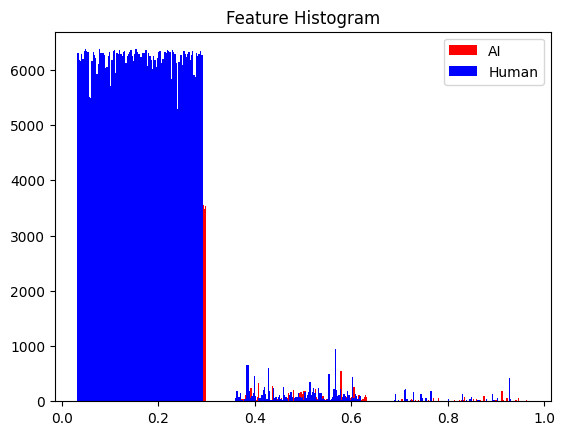

In [39]:
# Q2
import matplotlib.pyplot as plt

plt.hist(ai_feat, bins=3, label="AI", color=["red"] * 100)
plt.hist(human_feat, bins=3, label="Human", color=["blue"] * 100)
plt.legend()
plt.title("Feature Histogram")
plt.show()

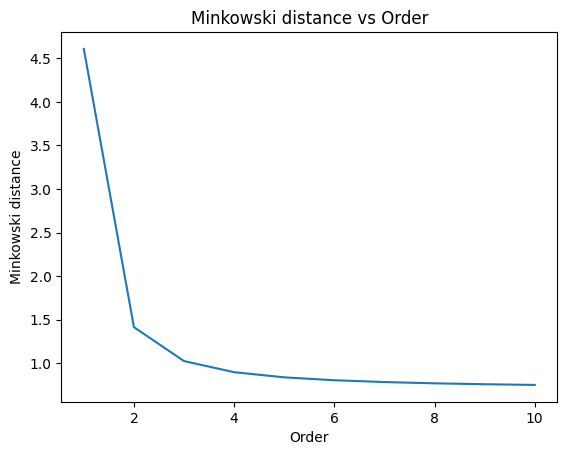

In [74]:
# Q3
import numpy as np
import matplotlib.pyplot as plt

def minkowski_distance(x, y):
    r = range(1, 11)
    dist = []

    for m in r:
        dist.append(np.linalg.norm(x - y, ord=m))

    return r, dist

r, dist = minkowski_distance(ai_feat.iloc[0], human_feat.iloc[0])

plt.plot(r, dist)
plt.title("Minkowski distance vs Order")
plt.xlabel("Order")
plt.ylabel("Minkowski distance")
plt.show()

print()

In [77]:
# Q4
from sklearn.model_selection import train_test_split

X = features
y = df["is_AI"]

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3)

In [103]:
# Q5
from sklearn.neighbors import KNeighborsClassifier

k = 3
model = KNeighborsClassifier(n_neighbors=k)

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [104]:
# Q6
model.score(X_test, y_test)

0.8776666666666667

In [105]:
# Q7
model.predict(X_test)

array([0, 1, 0, ..., 1, 0, 0])

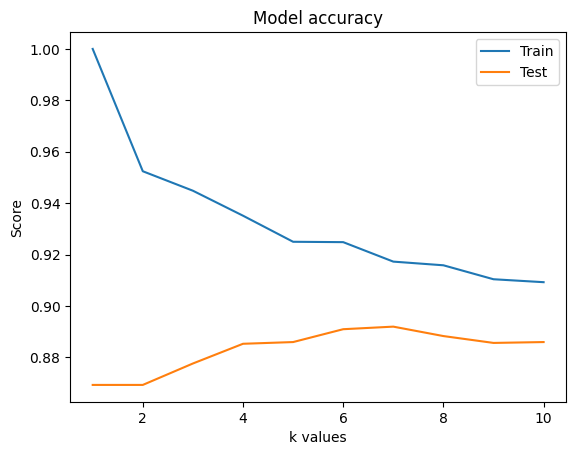

In [109]:
# Q8
import matplotlib.pyplot as plt

def compare_metrics(r, X, y, X_train, y_train, X_test, y_test):
  train_scores = []
  test_scores = []

  for i in range(1, r):
    k = i
    m2 = KNeighborsClassifier(n_neighbors=k)
    m2.fit(X_train, y_train)
    train_scores.append(m2.score(X_train, y_train))
    test_scores.append(m2.score(X_test, y_test))

  return train_scores, test_scores

r = 11
train_scores, test_scores = compare_metrics(r, X, y, X_train, y_train, X_test, y_test)

plt.plot(range(1, r), train_scores)
plt.plot(range(1, r), test_scores)

plt.title("Model accuracy")
plt.xlabel("k values")
plt.ylabel("Score")
plt.legend(["Train", "Test"])
plt.show()

In [118]:
# Q9
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, precision_score

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

c1 = confusion_matrix(y_train, y_pred_train)
p1, r1, f1, s1 = precision_recall_fscore_support(y_train, y_pred_train, beta=1)

c2 = confusion_matrix(y_test, y_pred_test)
p2, r2, f2, s2 = precision_recall_fscore_support(y_test, y_pred_test, beta=1)

print("Training Data\n")
print("Confusion Matrix:", c1)
print("Precision:", p1[1])
print("Recall:", r1[1])
print("F1-Score:", f1[1])
print()

print("Test Data\n")
print("Confusion Matrix:", c2)
print("Precision:", p2[1])
print("Recall:", r2[1])
print("F1-Score:", f2[1])
print()

Training Data

Confusion Matrix: [[4225  220]
 [ 166 2389]]
Precision: 0.9156765044078191
Recall: 0.9350293542074364
F1-Score: 0.9252517428350117

Test Data

Confusion Matrix: [[1710  218]
 [ 149  923]]
Precision: 0.8089395267309377
Recall: 0.8610074626865671
F1-Score: 0.8341617713511071



In [124]:
text = "The k-Nearest Neighbors (k-NN) algorithm is a simple yet powerful supervised machine learning technique used for classification and regression tasks. It works by identifying the 'k' closest data points (neighbors) to a given query point, based on a specified distance metric like Euclidean distance. For classification, k-NN assigns the most common class among these neighbors to the query point. In regression, it predicts the value as the average of the neighbors' values. Although computationally intensive with large datasets, k-NN is popular due to its ease of implementation and intuitive approach."
model.predict(vectorizer.transform([text]))

array([1])